# Ejercicio clase 2: Exploración de datos
<br/>

## Curso de Especialización en Inteligencia Artificial
## Inteligencia Artificial Embebida
<br/>

### Autor: Maximiliano Torti
### Fecha: 03/11/21
<br/>

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
from scipy import stats
from scipy.io import wavfile
import wave
from IPython.display import Audio

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20

import seaborn as sns

# Carga de metadatos

In [2]:
path = './data/'

file = "recording_52"

In [3]:
df_classes = pd.read_csv(path+file+".txt", sep="\t", header=None, names= ['tstart','tend','class'])

## Analisis metadatos

In [4]:
df_classes.head()

tstart      tend class
0  0.422315  0.942315  bite
1  1.713052  2.273052  bite
2  3.777042  4.455125  bite
3  5.043987  5.789855  bite
4  6.893845  7.377844  bite

In [5]:
df_classes['class'].unique()

array(['bite', 'chew', 'chewbite'], dtype=object)

Text(0.5, 1.0, 'Classes ocurrence')

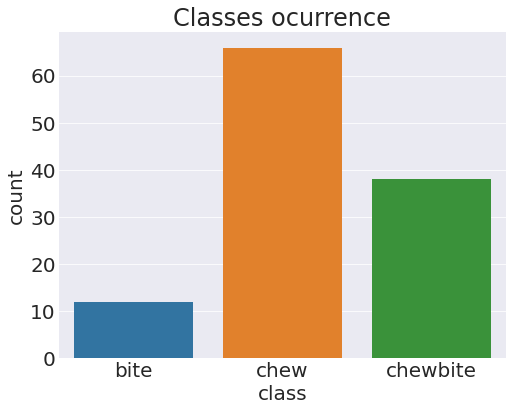

In [6]:
fig, ax = plt.subplots(1,figsize=(8,6))
sns.countplot(x='class',data=df_classes)  
ax.set_title('Classes ocurrence')

# Carga de audio

In [7]:
audio = wavfile.read(path+file+".wav")[1]

<ipython-input-7-ec236cd2f718>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  audio = wavfile.read(path+file+".wav")[1]


In [8]:
adq_freq= 22050

# Read file to get buffer                                                                                               
ifile = wave.open(path+file+".wav")
samples = ifile.getnframes()
audio = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int16 = np.frombuffer(audio, dtype=np.int16)
audio_as_np_float32 = audio_as_np_int16.astype(np.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16

t_audio = np.arange(audio_normalised.shape[0])/adq_freq

## Analisis de audio

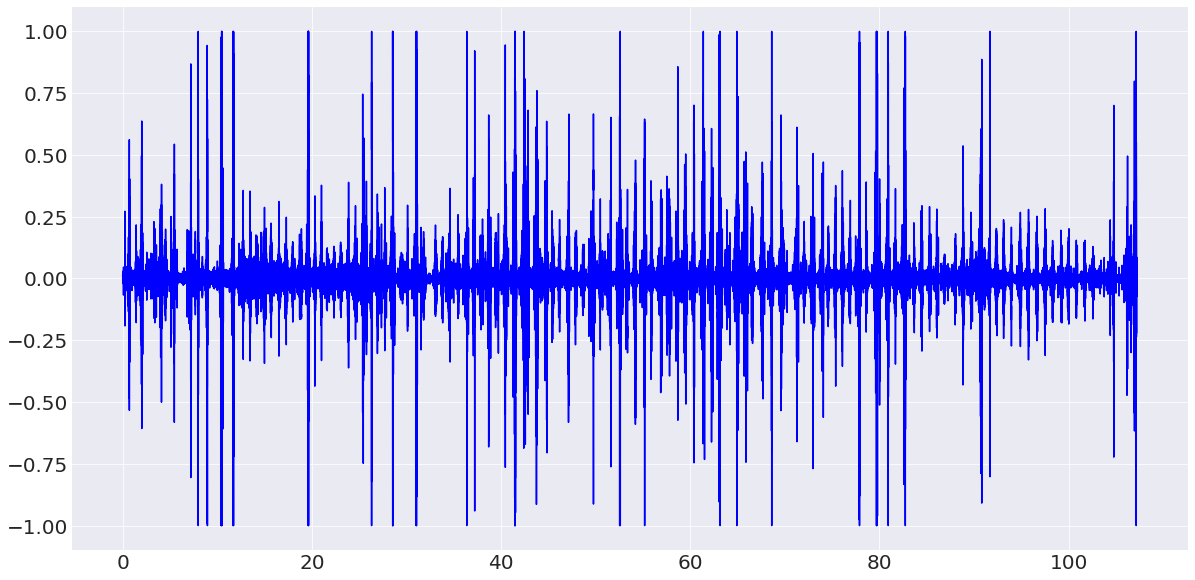

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(t_audio,audio_normalised,color='blue')
plt.show()

In [10]:
Audio(audio_normalised, rate=adq_freq)

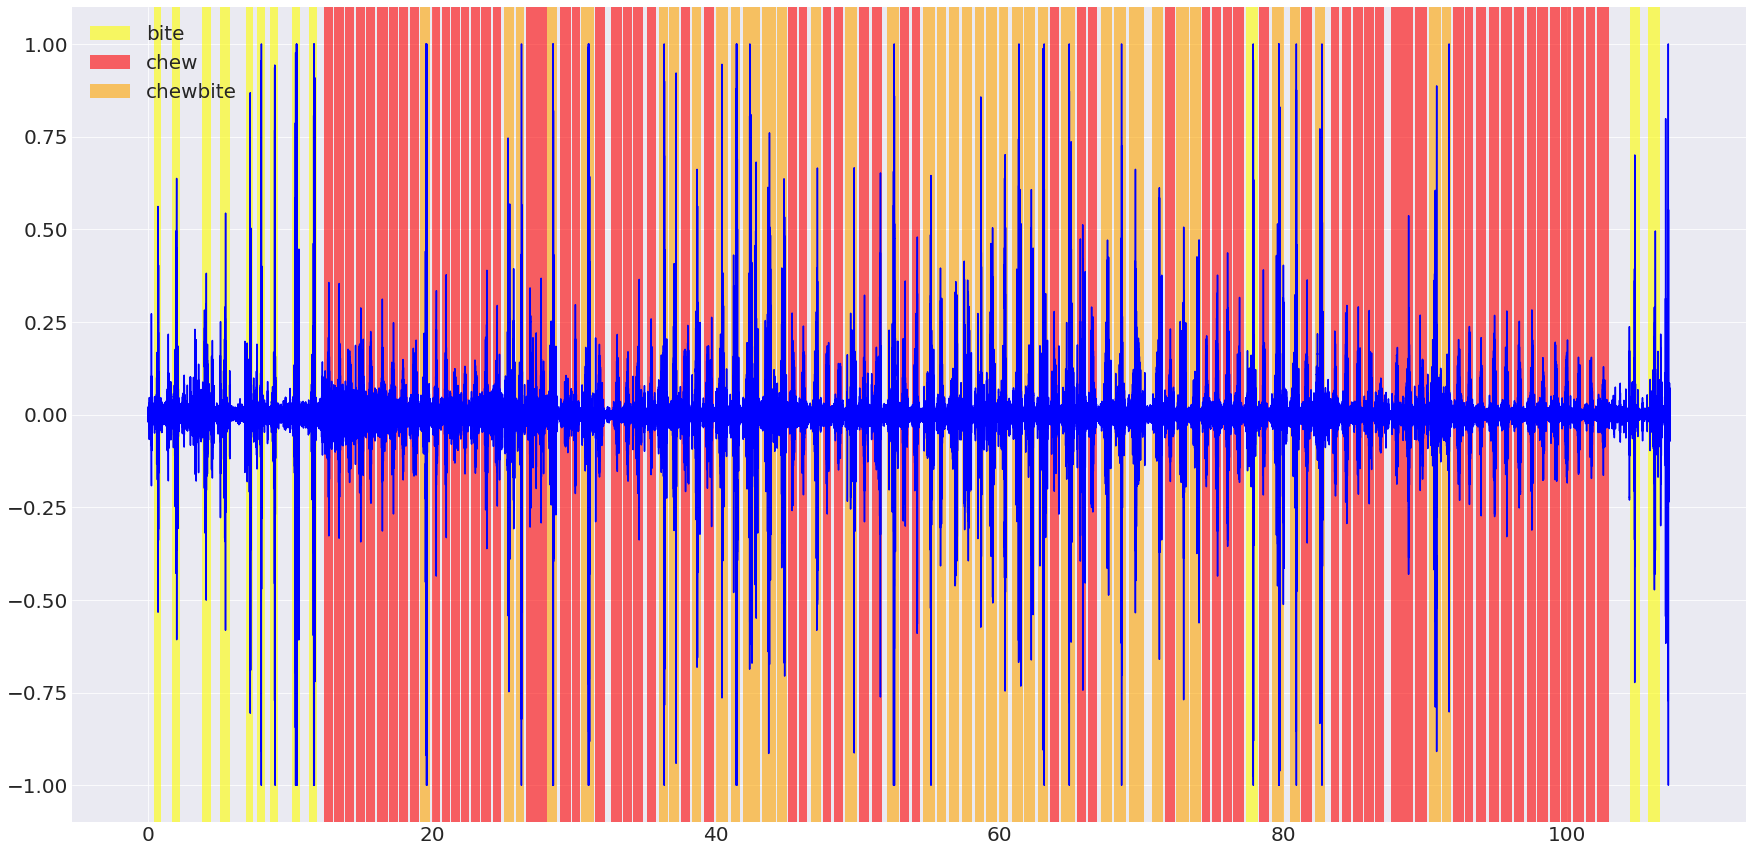

In [11]:
colors = {
  "bite": "yellow",
  "chewbite": "orange",
  "chew": 'red'
}

plt.figure(figsize=(30, 15))
plt.plot(t_audio,audio_normalised,color='blue')

for idx in range(len(df_classes)):
    plt.axvspan(df_classes['tstart'].iloc[idx], df_classes['tend'].iloc[idx], color=colors[df_classes['class'].iloc[idx]], 
                alpha=0.6, lw=0, label=df_classes['class'].iloc[idx])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

# Analisis de chew

In [12]:
chew_idxs = np.argwhere(np.array(df_classes['class'] =='chew'))

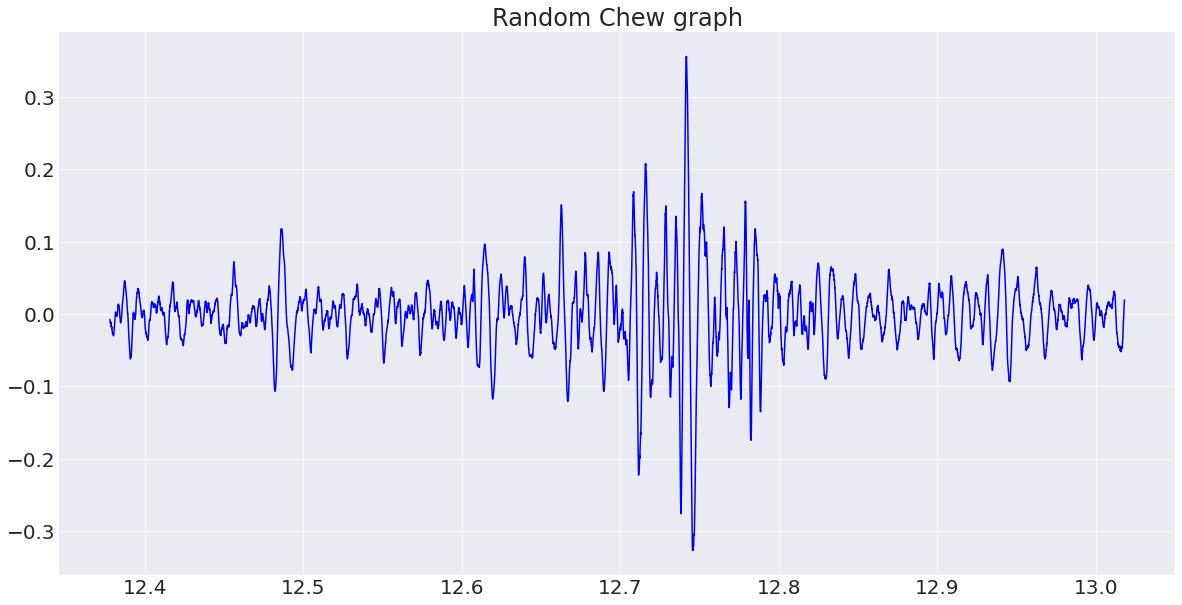

In [13]:
idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[chew_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[chew_idxs[0]]))[0])

plt.figure(figsize=(20, 10))
plt.plot(t_audio[idx1:idx2],audio_normalised[idx1:idx2],color='blue')
plt.title("Random Chew graph")
plt.show()

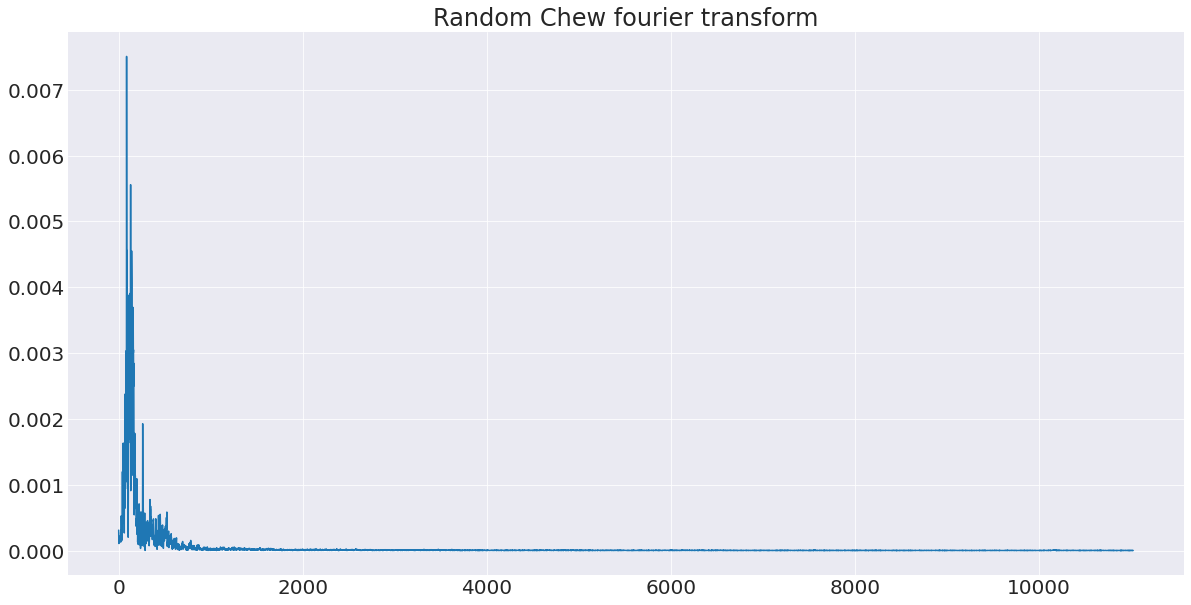

In [14]:
plt.figure(figsize=(20, 10))

idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[chew_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[chew_idxs[0]]))[0])
audio_cut = audio_normalised[idx1:idx2]
N = audio_cut.shape[0]
dt = 1/adq_freq
ft = np.fft.fft(audio_cut) * dt      
freq = np.fft.fftfreq(N, dt)
freq = freq[:int(N/2+1)-1]

plt.plot(freq, np.abs(ft[:int(N/2+1)-1]))

plt.title("Random Chew fourier transform")
plt.show()

In [15]:
Audio(audio_normalised[idx1:idx2], rate=adq_freq)

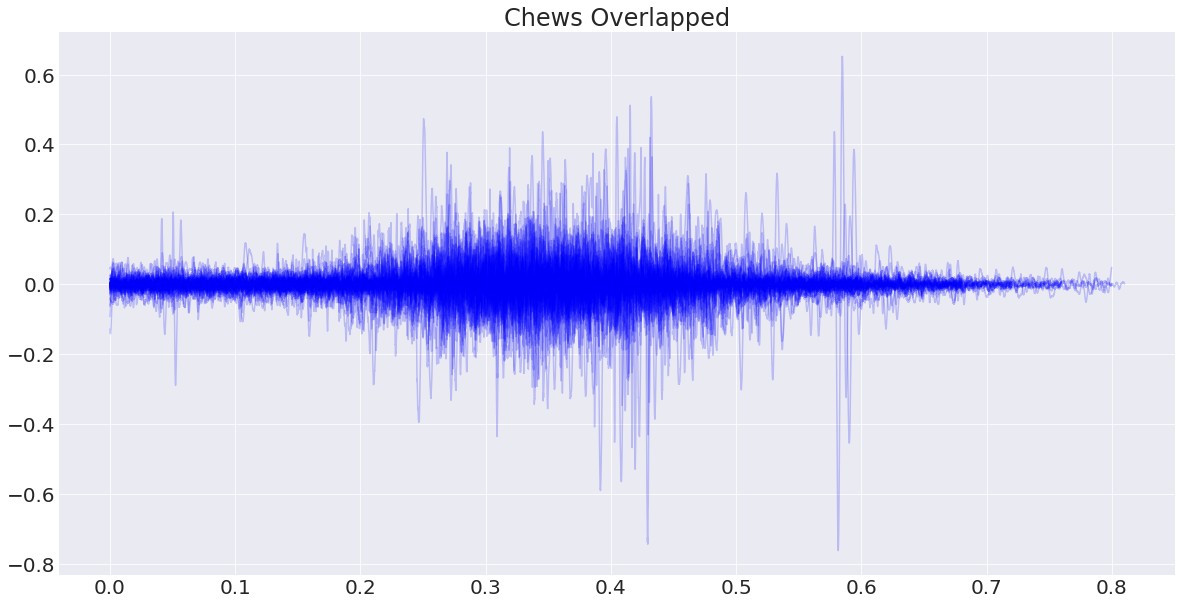

In [16]:
plt.figure(figsize=(20, 10))
for idx in chew_idxs:
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    plt.plot(np.arange(idx2-idx1)/adq_freq,audio_normalised[idx1:idx2],color='blue', alpha=0.2)
plt.title("Chews Overlapped")
plt.show()

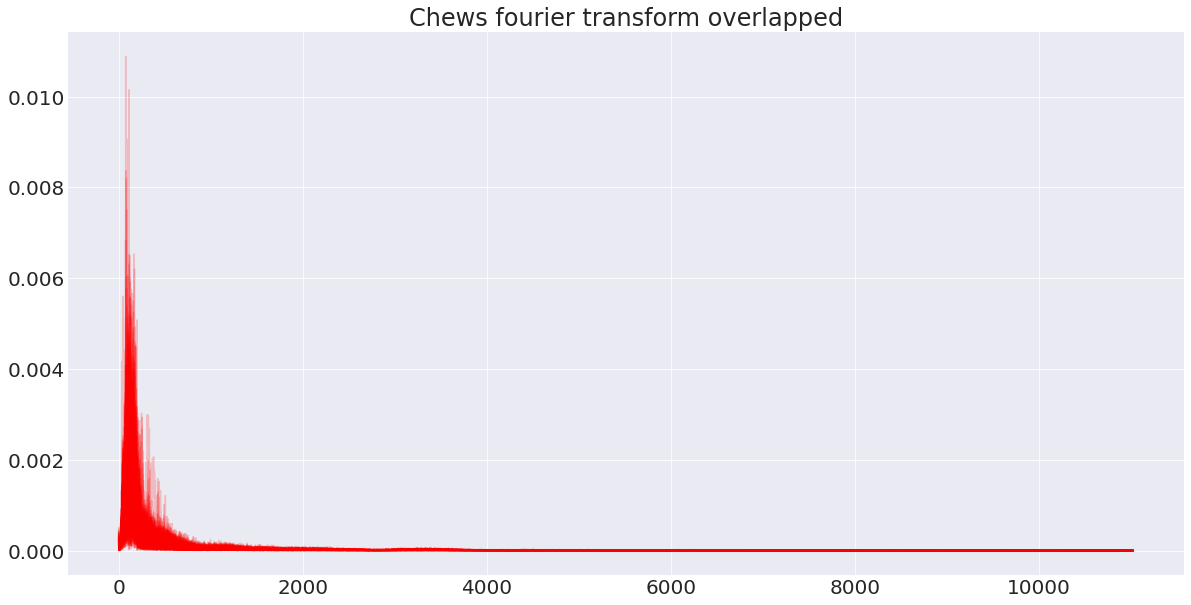

In [17]:
plt.figure(figsize=(20, 10))
for idx in chew_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)


plt.title("Chews fourier transform overlapped")
plt.show()

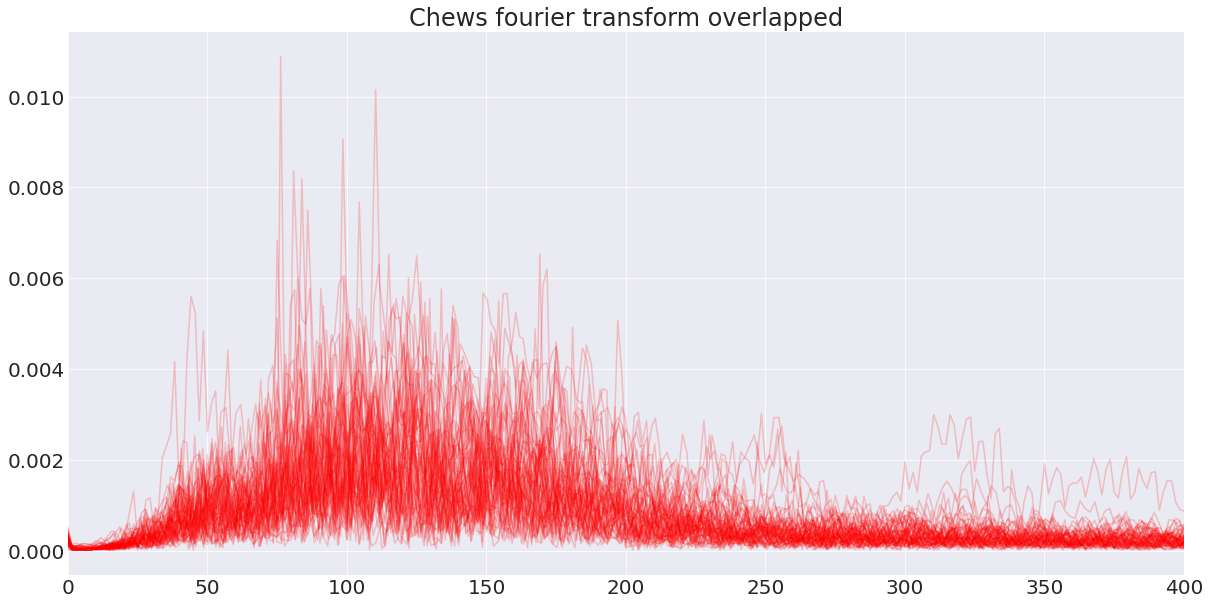

In [18]:
plt.figure(figsize=(20, 10))
for idx in chew_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)

plt.xlim(0,400)
plt.title("Chews fourier transform overlapped")
plt.show()

# Analisis de bite

In [19]:
bite_idxs = np.argwhere(np.array(df_classes['class'] =='bite'))

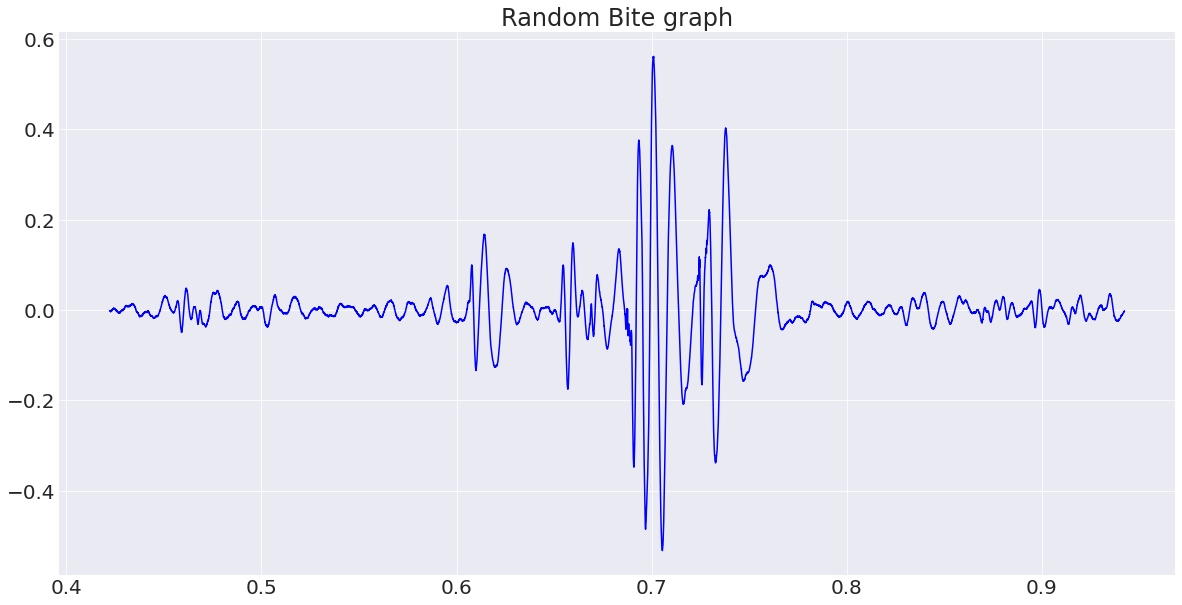

In [20]:
idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[bite_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[bite_idxs[0]]))[0])

plt.figure(figsize=(20, 10))
plt.plot(t_audio[idx1:idx2],audio_normalised[idx1:idx2],color='blue')
plt.title("Random Bite graph")
plt.show()

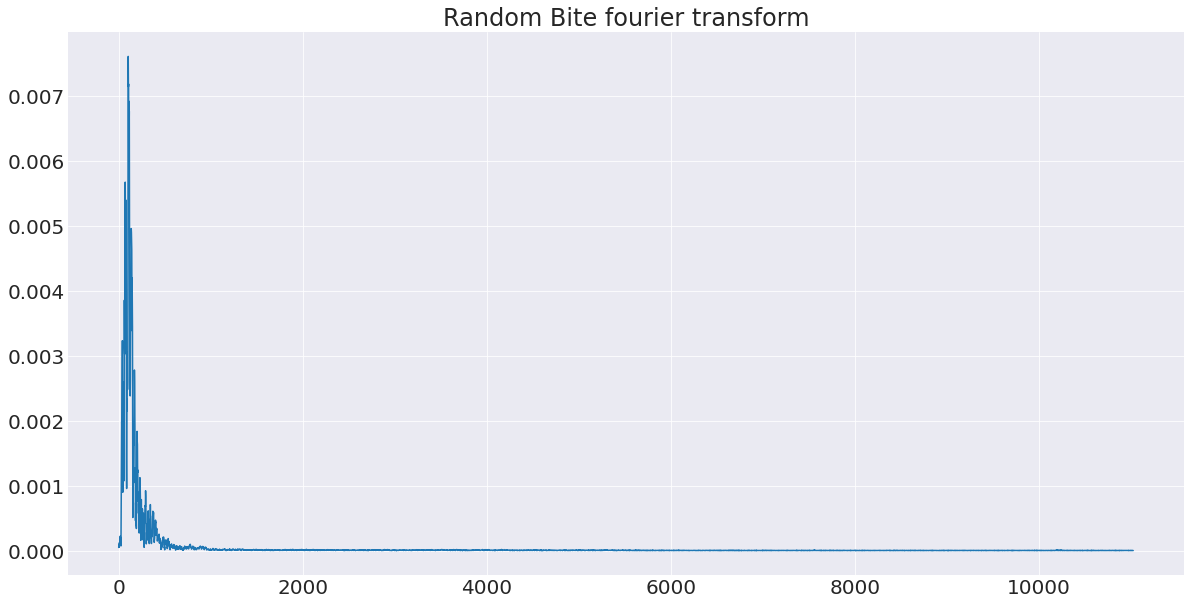

In [21]:
plt.figure(figsize=(20, 10))

idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[bite_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[bite_idxs[0]]))[0])
audio_cut = audio_normalised[idx1:idx2]
N = audio_cut.shape[0]
dt = 1/adq_freq
ft = np.fft.fft(audio_cut) * dt      
freq = np.fft.fftfreq(N, dt)
freq = freq[:int(N/2+1)-1]

plt.plot(freq, np.abs(ft[:int(N/2+1)-1]))

plt.title("Random Bite fourier transform")
plt.show()

In [22]:
Audio(audio_normalised[idx1:idx2], rate=adq_freq)

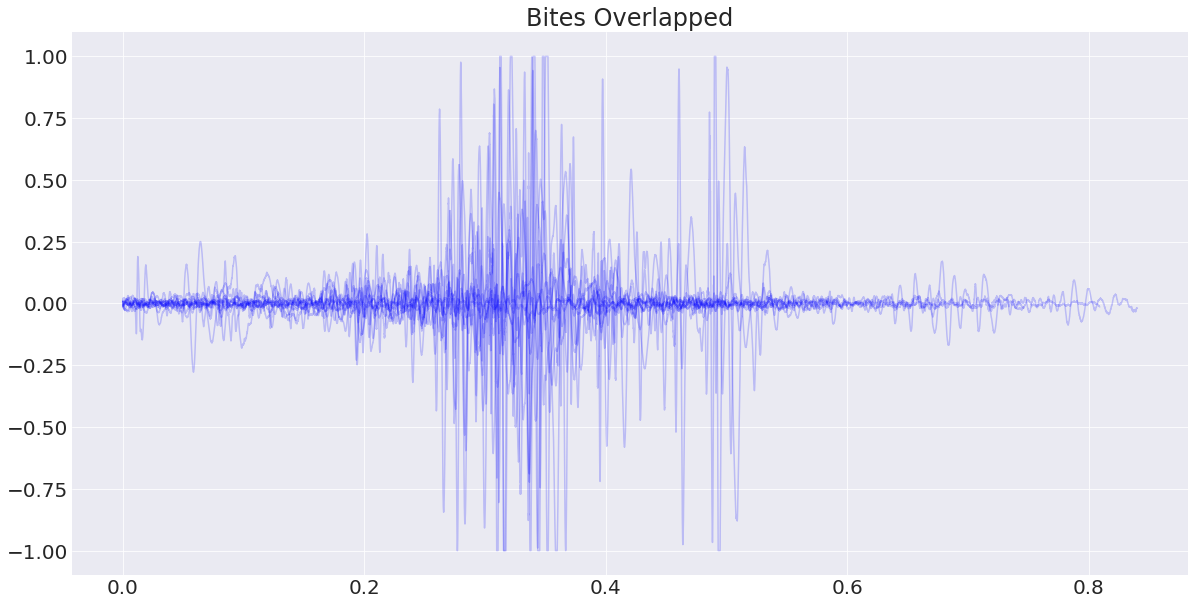

In [23]:
plt.figure(figsize=(20, 10))
for idx in bite_idxs:
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    plt.plot(np.arange(idx2-idx1)/adq_freq,audio_normalised[idx1:idx2],color='blue', alpha=0.2)
plt.title("Bites Overlapped")
plt.show()

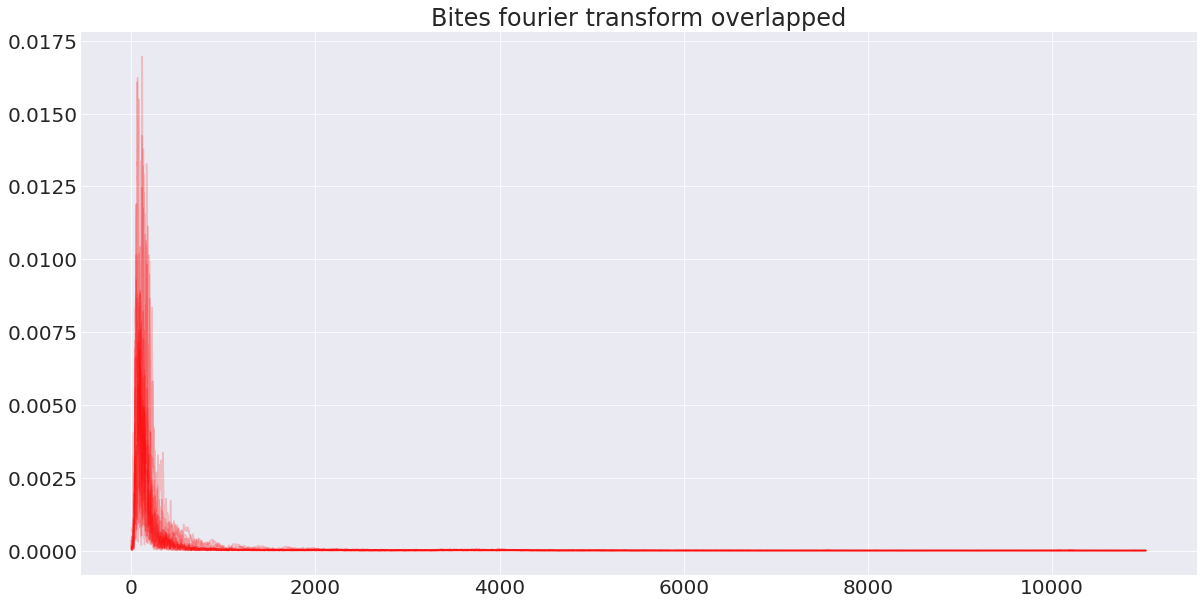

In [24]:
plt.figure(figsize=(20, 10))
for idx in bite_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)


plt.title("Bites fourier transform overlapped")
plt.show()

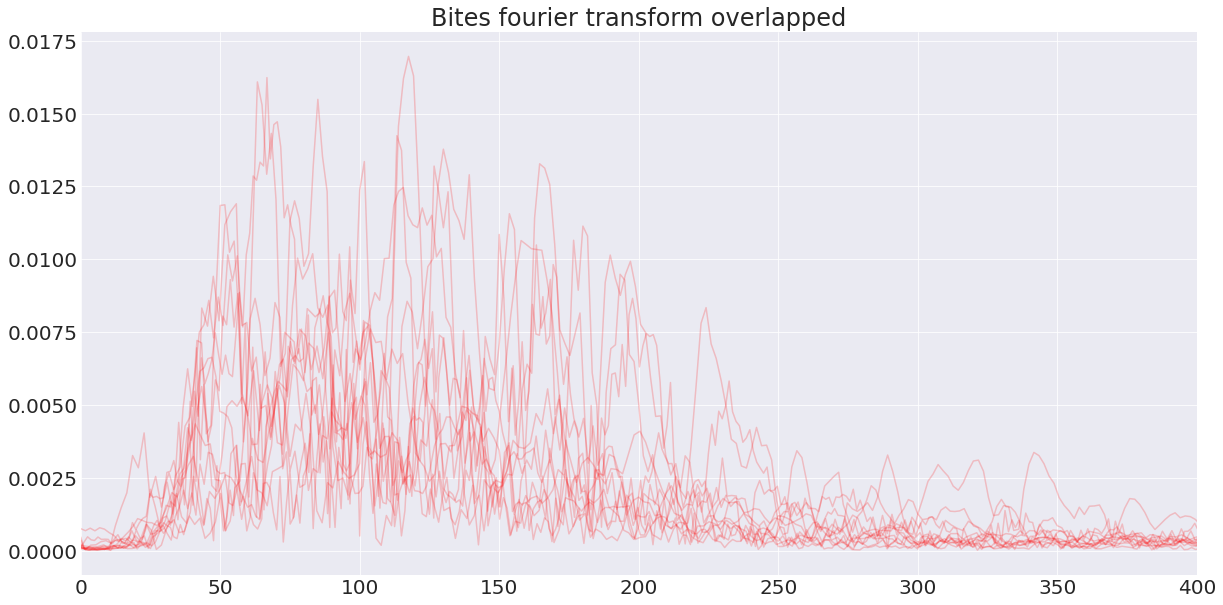

In [25]:
plt.figure(figsize=(20, 10))
for idx in bite_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)

plt.xlim(0,400)
plt.title("Bites fourier transform overlapped")
plt.show()

# Analisis de chewbite

In [26]:
chewbite_idxs = np.argwhere(np.array(df_classes['class'] =='chewbite'))

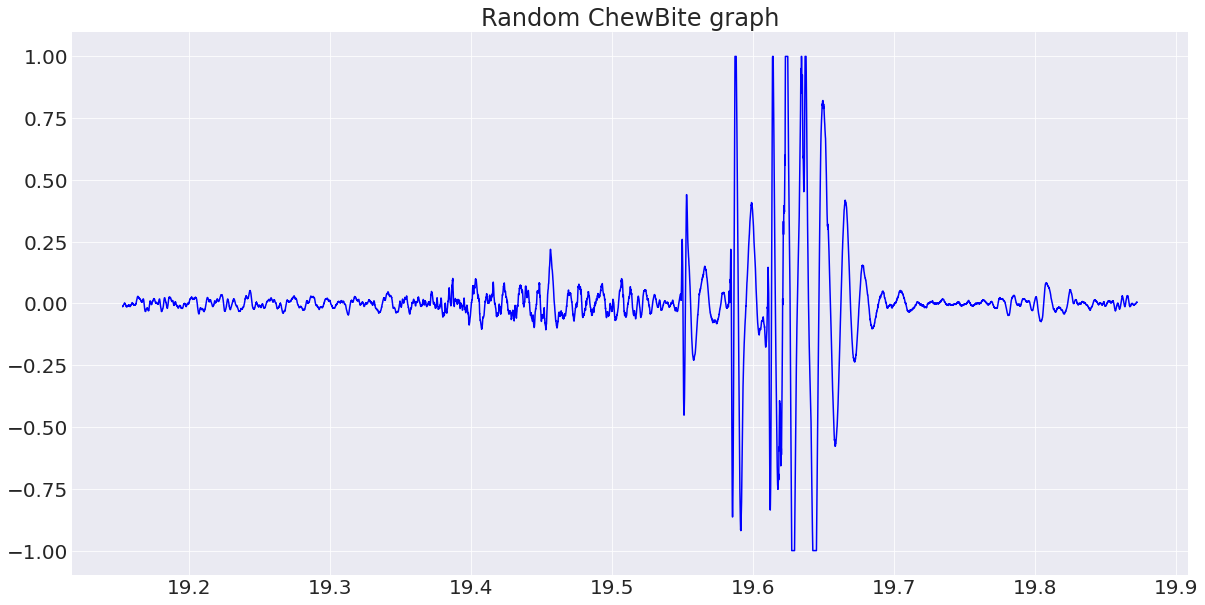

In [27]:
idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[chewbite_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[chewbite_idxs[0]]))[0])

plt.figure(figsize=(20, 10))
plt.plot(t_audio[idx1:idx2],audio_normalised[idx1:idx2],color='blue')
plt.title("Random ChewBite graph")
plt.show()

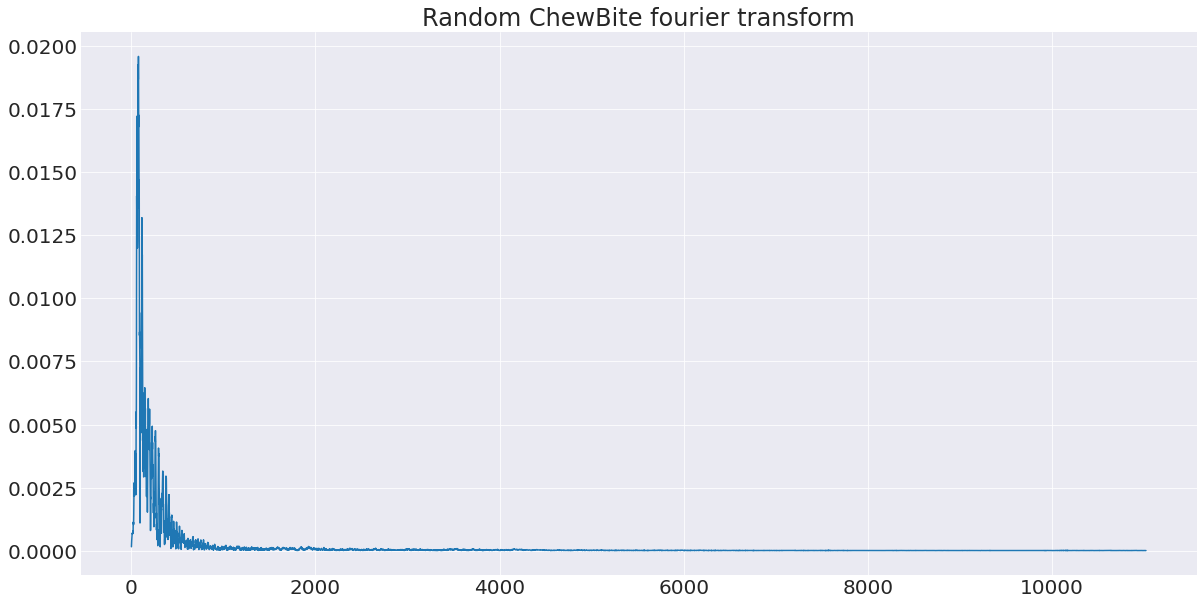

In [28]:
plt.figure(figsize=(20, 10))

idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[chewbite_idxs[0]]))[0])
idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[chewbite_idxs[0]]))[0])
audio_cut = audio_normalised[idx1:idx2]
N = audio_cut.shape[0]
dt = 1/adq_freq
ft = np.fft.fft(audio_cut) * dt      
freq = np.fft.fftfreq(N, dt)
freq = freq[:int(N/2+1)-1]

plt.plot(freq, np.abs(ft[:int(N/2+1)-1]))

plt.title("Random ChewBite fourier transform")
plt.show()

In [29]:
Audio(audio_normalised[idx1:idx2], rate=adq_freq)

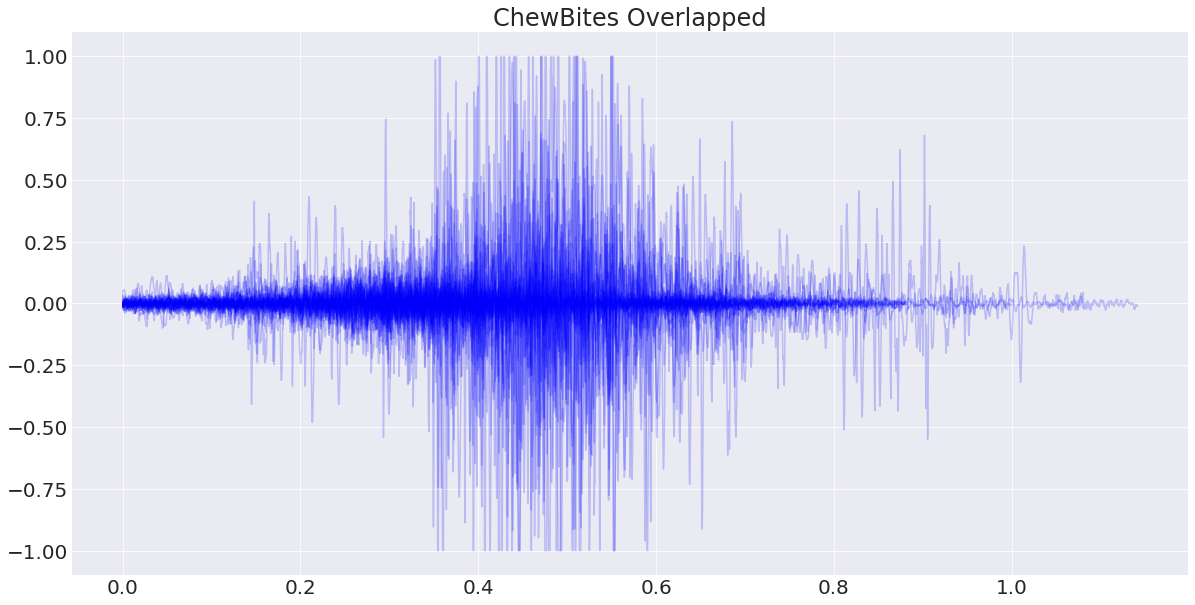

In [30]:
plt.figure(figsize=(20, 10))
for idx in chewbite_idxs:
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    plt.plot(np.arange(idx2-idx1)/adq_freq,audio_normalised[idx1:idx2],color='blue', alpha=0.2)
plt.title("ChewBites Overlapped")
plt.show()

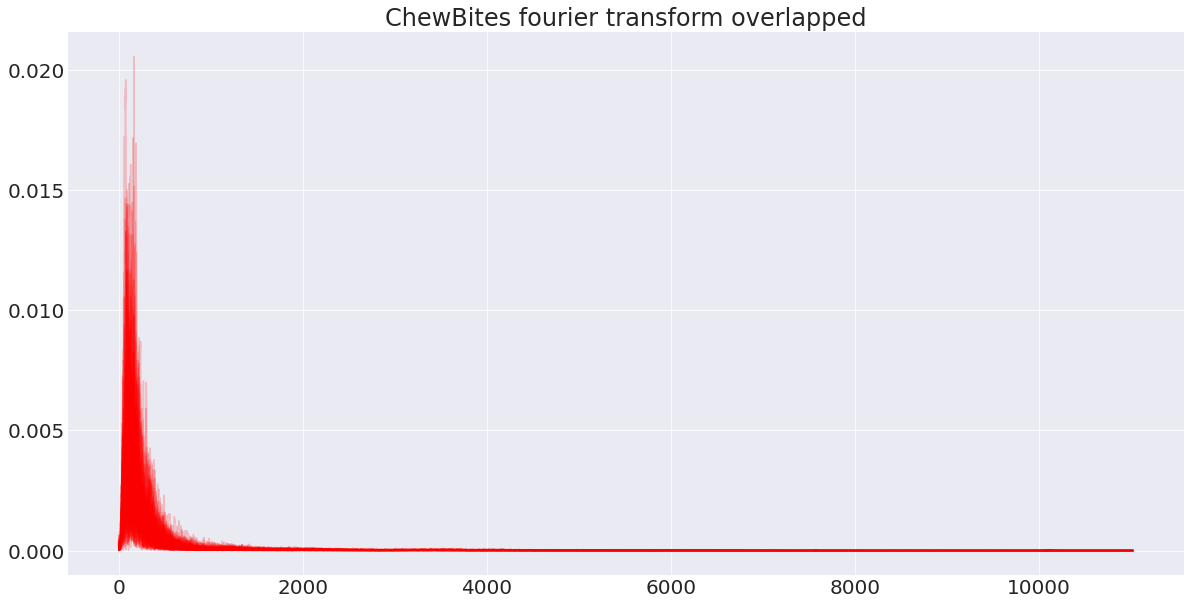

In [31]:
plt.figure(figsize=(20, 10))
for idx in chewbite_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)


plt.title("ChewBites fourier transform overlapped")
plt.show()

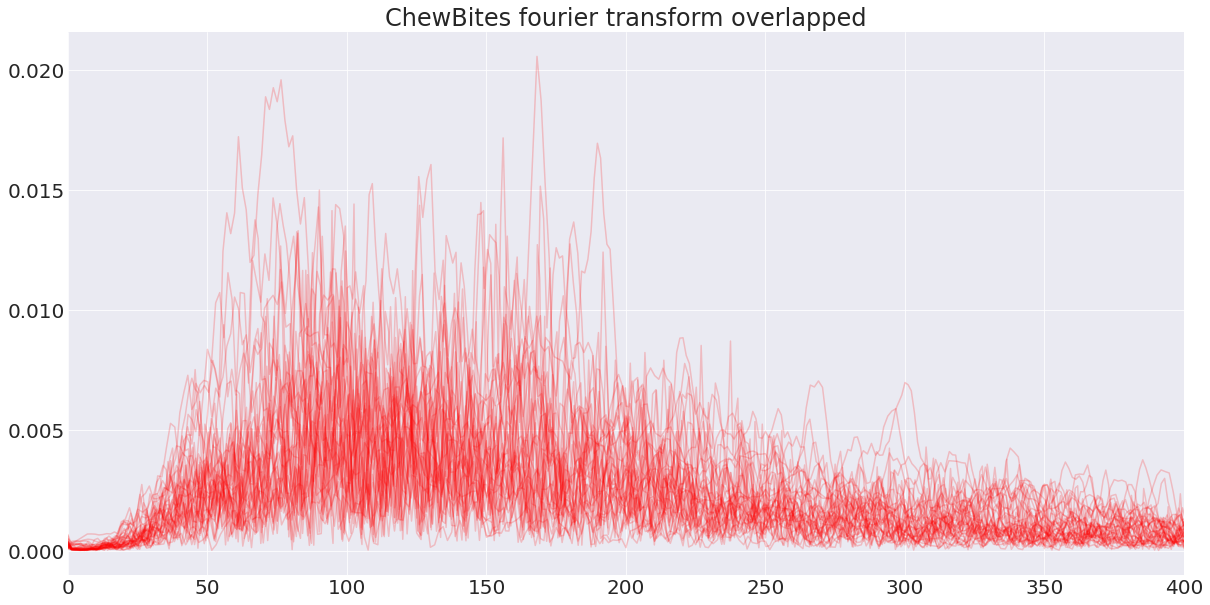

In [32]:
plt.figure(figsize=(20, 10))
for idx in chewbite_idxs:
    
    idx1=int(np.argwhere(t_audio>np.array(df_classes['tstart'].iloc[idx]))[0])
    idx2= int(np.argwhere(t_audio>np.array(df_classes['tend'].iloc[idx]))[0])
    audio_cut = audio_normalised[idx1:idx2]
    N = audio_cut.shape[0]
    dt = 1/adq_freq
    ft = np.fft.fft(audio_cut) * dt      
    freq = np.fft.fftfreq(N, dt)
    freq = freq[:int(N/2+1)-1]

    plt.plot(freq, np.abs(ft[:int(N/2+1)-1]), color='red', alpha=0.2)

plt.xlim(0,400)
plt.title("ChewBites fourier transform overlapped")
plt.show()